In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [16]:
df_csv = pd.read_csv('cleanDatasets/master_dataset.csv')
df = pd.DataFrame(df_csv)
print("Number of records: " + str(len(df)))
# df.columns.values
# df.lic_code.unique()

Number of records: 2232


In [17]:
# Filter

df = df[df['Opening_year'] >= 2010] # Only restaurants opened after 2010.

dfN = df[df['lic_code'].isnull() == True] # Identify locations with null lic_code
dfN['business_name'].unique() # Observe location by name, make determination about what to drop

# Dropping restaurant locations that are part of hotels, schools, have incomplete names
df = df.drop(df[df.business_name.isin(["sf hilton banquet facility","san francisco proper hotel  villon",
                                      'j  e restaurant', 'epicurean at mercy high school'
                                      ])].index)

# We want restaurants, not locations specialized in beverages
df = df[df.business_name.str.contains("cafe") == False]
df = df[df.business_name.str.contains("coffee") == False]
df = df[df.business_name.str.contains("tea") == False]
df = df[df.business_name.str.contains("juice") == False]
df = df[df.business_name.str.contains("boba") == False]

# Might as well remove the handful of bars/taverns that serve food (only 3)
df = df.drop(df[df.lic_code.isin(["Bars/taverns W/food Prep"])].index)

# Assigns LIC_Code to matching locations (ex: there might be 3 restaurants with the same name, a chain in these cases, and only one of those will have a LIC.)
df['lic_code'] = df['lic_code'].groupby(df['business_name']).ffill()


print(len(df))

983


In [18]:
# Add Rating and Price info from the Google Places API.

g_csv = pd.read_csv('places_price_ratings.csv')
g = pd.DataFrame(g_csv)

g = g.drop(['input_string','Unnamed: 0','latitude','longitude','name','number_of_results','status'],
                        axis=1)

df = df.join(g, lsuffix='full_address', rsuffix='formatted_address')

df = df.drop(['formatted_address'],
                        axis=1)

# Dropped rows with Nulls for ratings and price
df = df.dropna(subset=['price_level','rating'])
print(len(df))
df.head()

681


,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,name,...,HD02_S171,HD02_S180,HD02_S181,HD02_S184,Opening_year,Closing_year,Opening_month,Closing_month,price_level,rating
1,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,no,"139 8th st, San Francisco, CA, 94103",94408,sizzling pot king,...,18.4,100.0,9.4,90.6,2017,NaN,12,NaN,2.0,4.3
4,new york pizza kitchen,NaN,127 eddy st,2016-03-16,2017-03-14,363.0,yes,"127 eddy st, San Francisco, CA, 94102",91028,new york pizza kitchen,...,12.4,100.0,2.5,97.5,2016,2017.0,3,3.0,1.0,3.8
6,joint venture kitchen,"Restaurant 1,000 - 2,000 Sqft",167 11th street,2017-06-26,NaN,406.0,no,"167 11th street, San Francisco, CA, 94103",92980,joint venture kitchen,...,18.4,100.0,9.4,90.6,2017,NaN,6,NaN,3.0,4.7
11,yan yan seafood resaurant,"Restaurant Greater Than 2,000 Sqft",2241 judah st,2014-07-01,NaN,1497.0,no,"2241 judah st, San Francisco, CA, 94122",79565,yan yan seafood restaurant,...,4.2,100.0,50.1,49.9,2014,NaN,7,NaN,1.0,4.0
16,mr bread,"Restaurant Less Than 1,000 Sqft",1018 taraval st,2018-01-02,NaN,216.0,no,"1018 taraval st, San Francisco, CA, 94116",94616,mr bread,...,5.5,100.0,55.7,44.3,2018,NaN,1,NaN,1.0,4.7


In [19]:
df.columns

Index(['business_name', 'lic_code', 'street_address', 'business_start_date',
       'business_end_date', 'Lifespan', 'isClosed', 'full_address',
       'business_id', 'name',
       ...
       'HD02_S171', 'HD02_S180', 'HD02_S181', 'HD02_S184', 'Opening_year',
       'Closing_year', 'Opening_month', 'Closing_month', 'price_level',
       'rating'],
      dtype='object', length=111)

In [20]:
# Spatial.AI info

sp_csv = pd.read_csv('cleanDatasets/spatial_info.csv')
sp = pd.DataFrame(sp_csv)
print(list(sp))
sp = sp.drop(['latitude','longitude'],
                        axis=1)
df = df.join(sp, lsuffix='business_name', rsuffix='business_name')

['business_name', 'latitude', 'longitude', 'Q1_16_Nature_Exp', 'Q2_16_Nature_Exp', 'Q3_16_Nature_Exp', 'Q4_16_Nature_Exp', 'Q1_17_Nature_Exp', 'Q2_17_Nature_Exp', 'Q3_17_Nature_Exp', 'Q4_17_Nature_Exp', 'Q1_16_Family_Fun', 'Q2_16_Family_Fun', 'Q3_16_Family_Fun', 'Q4_16_Family_Fun', 'Q1_17_Family_Fun', 'Q2_17_Family_Fun', 'Q3_17_Family_Fun', 'Q4_17_Family_Fun', 'Q1_16_Healthy_Lifestyle', 'Q2_16_Healthy_Lifestyle', 'Q3_16_Healthy_Lifestyle', 'Q4_16_Healthy_Lifestyle', 'Q1_17_Healthy_Lifestyle', 'Q2_17_Healthy_Lifestyle', 'Q3_17_Healthy_Lifestyle', 'Q4_17_Healthy_Lifestyle', 'Q1_16_Nightlife_Hotspot', 'Q2_16_Nightlife_Hotspot', 'Q3_16_Nightlife_Hotspot', 'Q4_16_Nightlife_Hotspot', 'Q1_17_Nightlife_Hotspot', 'Q2_17_Nightlife_Hotspot', 'Q3_17_Nightlife_Hotspot', 'Q4_17_Nightlife_Hotspot', 'Q1_16_Artsy', 'Q2_16_Artsy', 'Q3_16_Artsy', 'Q4_16_Artsy', 'Q1_17_Artsy', 'Q2_17_Artsy', 'Q3_17_Artsy', 'Q4_17_Artsy', 'Q1_16_Foodie', 'Q2_16_Foodie', 'Q3_16_Foodie', 'Q4_16_Foodie', 'Q1_17_Foodie', 'Q2_1

In [23]:
df['Foodie_16'] = df[['Q1_16_Foodie', 'Q2_16_Foodie', 'Q3_16_Foodie', 'Q4_16_Foodie']].mean(axis=1)
df['Foodie_17'] = df[['Q1_17_Foodie', 'Q2_17_Foodie', 'Q3_17_Foodie', 'Q4_17_Foodie']].mean(axis=1)

df['Nature_Exp_16'] = df[['Q1_16_Nature_Exp', 'Q2_16_Nature_Exp', 'Q3_16_Nature_Exp', 'Q4_16_Nature_Exp']].mean(axis=1)
df['Nature_Exp_17'] = df[['Q1_17_Nature_Exp', 'Q2_17_Nature_Exp', 'Q3_17_Nature_Exp', 'Q4_17_Nature_Exp']].mean(axis=1)

df['Family_Fun_16'] = df[['Q1_16_Family_Fun', 'Q2_16_Family_Fun', 'Q3_16_Family_Fun', 'Q4_16_Family_Fun']].mean(axis=1)
df['Family_Fun_17'] = df[['Q1_17_Family_Fun', 'Q2_17_Family_Fun', 'Q3_17_Family_Fun', 'Q4_17_Family_Fun']].mean(axis=1)

df['Hipster_16'] = df[['Q1_16_Hipster', 'Q2_16_Hipster', 'Q3_16_Hipster', 'Q4_16_Hipster']].mean(axis=1)
df['Hipster_17'] = df[['Q1_17_Hipster', 'Q2_17_Hipster', 'Q3_17_Hipster', 'Q4_17_Hipster']].mean(axis=1)

df['Beautiful_Scenery_16'] = df[['Q1_16_Beautiful_Scenery', 'Q2_16_Beautiful_Scenery', 'Q3_16_Beautiful_Scenery', 'Q4_16_Beautiful_Scenery']].mean(axis=1)
df['Beautiful_Scenery_17'] = df[['Q1_17_Beautiful_Scenery', 'Q2_17_Beautiful_Scenery', 'Q3_17_Beautiful_Scenery', 'Q4_17_Beautiful_Scenery']].mean(axis=1)

df['Nightlife_Hotspot_16'] = df[['Q1_16_Nightlife_Hotspot', 'Q2_16_Nightlife_Hotspot', 'Q3_16_Nightlife_Hotspot', 'Q4_16_Nightlife_Hotspot']].mean(axis=1)
df['Nightlife_Hotspot_17'] = df[['Q1_17_Nightlife_Hotspot', 'Q2_17_Nightlife_Hotspot', 'Q3_17_Nightlife_Hotspot', 'Q4_17_Nightlife_Hotspot']].mean(axis=1)

df['Artsy_16'] = df[['Q1_16_Artsy', 'Q2_16_Artsy', 'Q3_16_Artsy', 'Q4_16_Artsy']].mean(axis=1)
df['Artsy_17'] = df[['Q1_17_Artsy', 'Q2_17_Artsy', 'Q3_17_Artsy', 'Q4_17_Artsy']].mean(axis=1)

df = df.rename(columns={'business_namebusiness_name': 'business_name'})

print(len(df))


681


In [24]:
df.to_csv("cleanDatasets/master_dataset2010.csv",index=False)
print(len(df))

681


In [37]:
df.head()

,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,name,...,Family_Fun_16,Family_Fun_17,Hipster_16,Hipster_17,Beautiful_Scenery_16,Beautiful_Scenery_17,Nightlife_Hotspot_16,Nightlife_Hotspot_17,Artsy_16,Artsy_17
1,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,1,"139 8th st, San Francisco, CA, 94103",94408,sizzling pot king,...,76.6100,77.5075,93.2700,93.1600,44.2050,37.0050,94.5300,94.6300,97.0400,96.9325
4,new york pizza kitchen,NaN,127 eddy st,2016-03-16,2017-03-14,363.0,0,"127 eddy st, San Francisco, CA, 94102",91028,new york pizza kitchen,...,77.3875,77.2050,91.1850,89.6100,74.7700,65.3475,96.7825,96.8625,96.9075,96.6250
6,joint venture kitchen,"Restaurant 1,000 - 2,000 Sqft",167 11th street,2017-06-26,NaN,406.0,1,"167 11th street, San Francisco, CA, 94103",92980,joint venture kitchen,...,62.0275,59.9600,59.9200,60.7225,16.6400,18.2500,62.1175,62.8050,74.8000,76.5050
11,yan yan seafood resaurant,"Restaurant Greater Than 2,000 Sqft",2241 judah st,2014-07-01,NaN,1497.0,1,"2241 judah st, San Francisco, CA, 94122",79565,yan yan seafood restaurant,...,70.5175,71.6850,78.2125,78.4650,83.2300,79.9875,90.9750,90.7875,88.4225,88.3775
16,mr bread,"Restaurant Less Than 1,000 Sqft",1018 taraval st,2018-01-02,NaN,216.0,1,"1018 taraval st, San Francisco, CA, 94116",94616,mr bread,...,65.7800,70.7625,84.3175,85.5725,31.0575,47.6575,91.0050,91.1200,93.3375,93.3075


In [25]:
df.columns

Index(['business_name', 'lic_code', 'street_address', 'business_start_date',
       'business_end_date', 'Lifespan', 'isClosed', 'full_address',
       'business_id', 'name',
       ...
       'Family_Fun_16', 'Family_Fun_17', 'Hipster_16', 'Hipster_17',
       'Beautiful_Scenery_16', 'Beautiful_Scenery_17', 'Nightlife_Hotspot_16',
       'Nightlife_Hotspot_17', 'Artsy_16', 'Artsy_17'],
      dtype='object', length=190)

In [26]:
print('-------------------Filter Data Summary---------------------')
print('**********************************************************************')
print('--------------------Number of Openings, 2010-2018---------------------')
print(df.groupby('Opening_year').size())
print('--------------------Number of Closures, 2010-2018---------------------')
print(df.groupby('Closing_year').size())
print('----------------Count of restaurants openings, by districts--------------------')
df_openLocations = df[df['isClosed'] == "no"]
print(pd.value_counts(df_openLocations['district'].values, sort=True))
print('----------------Count of restaurants closures, by districts--------------------')
df_closedLocations = df[df['isClosed'] == "yes"]
print(pd.value_counts(df_closedLocations['district'].values, sort=True))
print('----------------------------------------------------------------------')
print('Restaurants "Chains", i.e. with multiple locations. NOT DUPLICATES')
# print(df.groupby('business_name').filter(lambda x: len(x) > 2).sort_values(by ='business_name',ascending=False))
print('--------------------Count of restaurants, by type---------------------')
print(pd.value_counts(df['lic_code'].values, sort=True))
print('--------------------Count of Ratings, by type---------------------')
print(pd.value_counts(df['rating'].values, sort=True))
print('--------------------Count of Price Ranges, by type---------------------')
print(pd.value_counts(df['price_level'].values, sort=True))
print('----------------Foodie Average, by districts, 2017--------------------')
print(df['Foodie_17'].groupby(df['district']).mean().sort_values(ascending=False))
print('----------------Foodie Average, by districts, 2016--------------------')
print(df['Foodie_16'].groupby(df['district']).mean().sort_values(ascending=False))
print('----------------Foodie Average, by districts, 2017--------------------')
print(df['Foodie_17'].groupby(df['district']).mean().sort_values(ascending=False))
print('----------------Foodie Average, by districts, 2016--------------------')
print(df['Foodie_16'].groupby(df['district']).mean().sort_values(ascending=False))

-------------------Filter Data Summary---------------------
**********************************************************************
--------------------Number of Openings, 2010-2018---------------------
Opening_year
2010    62
2011    76
2012    78
2013    95
2014    90
2015    98
2016    99
2017    57
2018    26
dtype: int64
--------------------Number of Closures, 2010-2018---------------------
Closing_year
2015.0     8
2016.0    14
2017.0    29
2018.0     7
dtype: int64
----------------Count of restaurants openings, by districts--------------------
Mission                         53
South of Market                 48
Financial District              45
Inner Richmond                  33
Chinatown                       32
Tenderloin                      32
Outer Sunset                    24
Lower Nob Hill                  22
Outer Richmond                  22
Polk Gulch                      14
Inner Sunset                    13
North Beach                     12
Mission Dolores         

In [27]:
# dfN['business_name'].unique()
# df = df.dropna(subset=['lic_code']) # Remove NaN values in 'lic_code'
len(df)

681

/Users/charlieyoubitme/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/charlieyoubitme/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


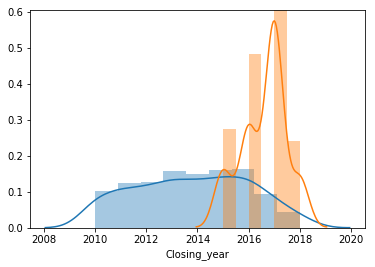

In [28]:
# https://seaborn.pydata.org/tutorial/categorical.html
Cmonths = df["Closing_month"].dropna()
Cyears = df["Closing_year"].dropna()
sns.distplot(df["Opening_year"])
sns.distplot(Cyears)

/Users/charlieyoubitme/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/charlieyoubitme/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


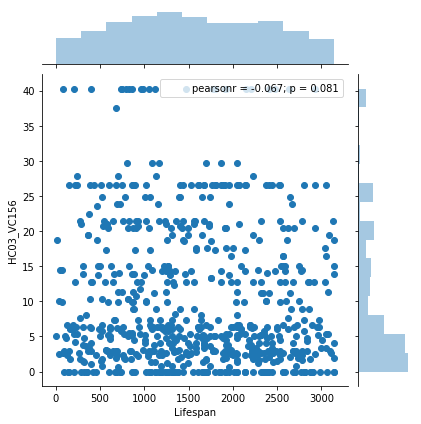

In [29]:
sns.jointplot(x='Lifespan', y='HC03_VC156', data = df);

In [30]:
sns.catplot(x="Opening_year", y="HC01_VC36", hue="lic_code",
            col="isClosed", aspect=.6,
            kind="swarm", data=df);

# HC01_VC36 is mean travel time for workers (census tract level) in minutes

AttributeError: module 'seaborn' has no attribute 'catplot'

In [ ]:
sns.catplot(x="Opening_year", hue="lic_code", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

In [31]:
####################################### Regression Testing ########################################################33

In [32]:
# One Hot-Encoding binary (True/False variables)
    # https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
    # https://www.kaggle.com/getting-started/27270

df['isClosed'] = pd.get_dummies(df['isClosed']) # no: 1, yes: 0

df['price_level'] = df['price_level'].round(0).astype(int) # No need for encoding, just convert to int.

df['lic_cat'] = encoder.transform(df['lic_code'])
df['lic_cat']

NameError: name 'encoder' is not defined

In [33]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
# le.fit(df['lic_code'])

len(df.lic_code.dropna())

559

In [34]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 3))
# plt.hist(df.Lifespan)
# plt.xlabel('Lifespan (Days)')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.MA)
# plt.xlabel('Healthscores')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.HD01_S001)
# plt.xlabel('Population by Tracts')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.Opening_year)
# plt.xlabel('Opening Year')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.price_level.dropna())
# plt.xlabel('Price Levels')
# plt.ylabel('count')
# plt.tight_layout()

# plt.figure(figsize=(8, 3))
# plt.hist(df.rating.dropna())
# plt.xlabel('Ratings (from Google)')
# plt.ylabel('count')
# plt.tight_layout()

In [35]:
# Reference: https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html#sphx-glr-packages-scikit-learn-auto-examples-plot-boston-prediction-py
# https://stackoverflow.com/questions/28334091/turning-a-pandas-dataframe-to-an-array-and-evaluate-multiple-linear-regression-m
from sklearn.linear_model import LinearRegression
df.shape
X = df[['Foodie_17']].as_matrix()
y =df[''].values
model = LinearRegression()
model.fit(X, y)

/Users/charlieyoubitme/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


KeyError: ''

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(8, 6))
plt.scatter(expected, predicted)
plt.plot([0, 3500], [0, 3500], '--k')
plt.axis('tight')
plt.xlabel('True Lifespan')
plt.ylabel('Predicted Lifespan')
plt.tight_layout()

In [36]:
https://www.scipy-lectures.org/packages/statistics/auto_examples/plot_wage_education_gender.html
http://andrewgaidus.com/Spatial_Econonometric_Modeling/
http://darribas.org/gds_scipy16/ipynb_md/08_spatial_regression.html
http://people.duke.edu/~rnau/testing.htm
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

SyntaxError: invalid syntax (<ipython-input-36-3fa56249f7b8>, line 1)

In [357]:
# df.Lifespan.sort_values(ascending=False)

In [ ]:
###########################################################################################################################

In [361]:
df.head()

,business_name,lic_code,street_address,business_start_date,business_end_date,Lifespan,isClosed,full_address,business_id,name,...,Q1_16_Beautiful_Scenery,Q2_16_Beautiful_Scenery,Q3_16_Beautiful_Scenery,Q4_16_Beautiful_Scenery,Q1_17_Beautiful_Scenery,Q2_17_Beautiful_Scenery,Q3_17_Beautiful_Scenery,Q4_17_Beautiful_Scenery,Foodie_16,Foodie_17
1,sizzling pot king,"Restaurant 1,000 - 2,000 Sqft",139 8th st,2017-12-28,NaN,221.0,1,"139 8th st, San Francisco, CA, 94103",94408,sizzling pot king,...,48.81,44.99,44.90,38.12,43.44,30.95,35.42,38.21,71.7725,72.4775
4,new york pizza kitchen,NaN,127 eddy st,2016-03-16,2017-03-14,363.0,0,"127 eddy st, San Francisco, CA, 94102",91028,new york pizza kitchen,...,67.69,78.21,75.89,77.29,77.06,69.04,58.59,56.70,78.1975,77.4675
6,joint venture kitchen,"Restaurant 1,000 - 2,000 Sqft",167 11th street,2017-06-26,NaN,406.0,1,"167 11th street, San Francisco, CA, 94103",92980,joint venture kitchen,...,11.56,18.19,18.74,18.07,17.89,18.40,18.42,18.29,61.0425,61.7450
11,yan yan seafood resaurant,"Restaurant Greater Than 2,000 Sqft",2241 judah st,2014-07-01,NaN,1497.0,1,"2241 judah st, San Francisco, CA, 94122",79565,yan yan seafood restaurant,...,79.95,83.50,80.00,89.47,80.00,80.00,79.96,79.99,76.9625,78.2350
16,mr bread,"Restaurant Less Than 1,000 Sqft",1018 taraval st,2018-01-02,NaN,216.0,1,"1018 taraval st, San Francisco, CA, 94116",94616,mr bread,...,14.43,21.53,39.63,48.64,55.52,52.29,35.91,46.91,77.1225,76.1700
